In [2]:
from EM import EM
from NN import NN
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mp
from sklearn.feature_selection import VarianceThreshold

def plot_sample(point, label):
    covariance = (1 / (len(point) - 1)) * np.dot(np.transpose(point), point)
    eigenvalue, rotation = np.linalg.eig(covariance)
    variance = np.sqrt(eigenvalue)

    # point after PCA
    point = np.dot(point, rotation)

    # plot
    plt.rcParams["figure.dpi"] = 200

    color = ("silver", "red", "blue", "seagreen", "cyan",
             "magenta", "orange", "purple")
    color_set = [color[int(np.argmax(i))] for i in label]

    fig, ax = plt.subplots()
    ax.scatter(point[:, np.argmax(variance)], point[:, 1], s=2, color=color_set)

    legend = [mp.Patch(color=color[i], label="Gaussian_{}".format(i))
              for i in range(len(label[0]))]
    plt.legend(handles=legend, fontsize=8)

    #ax.set_xscale('log')
    #ax.set_yscale('log')
    plt.grid()
    plt.show()

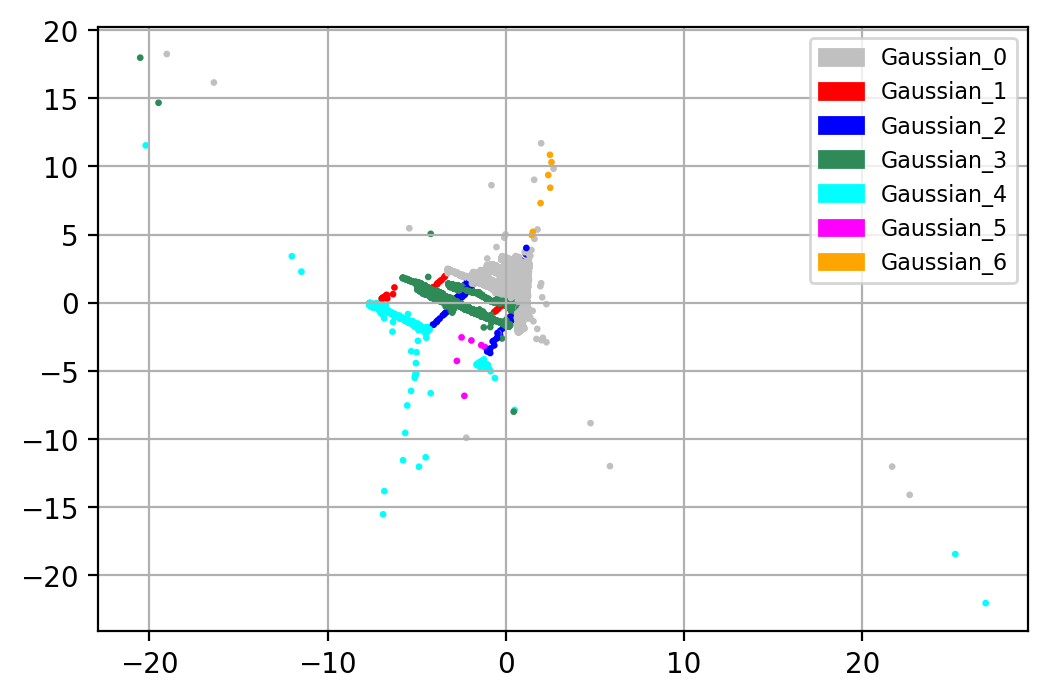

In [3]:
D = 9
K = 7

# parameters for neural networks
neuron_1     = {0: K}
neuron_2_10  = {0: 10, 1: K}
neuron_2_100 = {0: 100, 1: K}
act_func_1 = {0: NN.softmax}
act_func_2 = {0: NN.relu, 1: NN.softmax}

# read whole train set
data = np.loadtxt("train", delimiter=" ")
point = data[:, :D]
label = np.zeros([len(data), K])
for i in range(len(data)): label[i][int(data[i][D])-1] = 1

# split whole train set into train and validation set
index = int(0.9 * len(data))
train_point = np.array([point[i] for i in range(index)])
train_label = np.array([label[i] for i in range(index)])
valid_point = np.array([point[i] for i in range(index, len(data))])
valid_label = np.array([label[i] for i in range(index, len(data))])

# read test set
data  = np.loadtxt("test", delimiter=" ")
test_point = data[:, :D]
test_label = np.zeros([len(data), K])
for i in range(len(data)): label[i][int(data[i][D])-1] = 1

# mean center and scale the data
mean = np.mean(train_point, axis=0)
variance = np.std(train_point, axis=0)
train_point = (train_point - mean) / variance
valid_point = (valid_point - mean) / variance
test_point  = (test_point  - mean) / variance

plot_sample(train_point, train_label)

In [4]:
sel = VarianceThreshold(threshold=1)
x = sel.fit_transform(train_point)
print(train_point[0])
print(x[0])

[ 0.1432142   0.28713593 -0.93424958 -0.00632203 -0.30099262 -0.00708393
 -0.76622602 -0.13361881  0.31405698]
[-0.93424958 -0.76622602 -0.13361881]


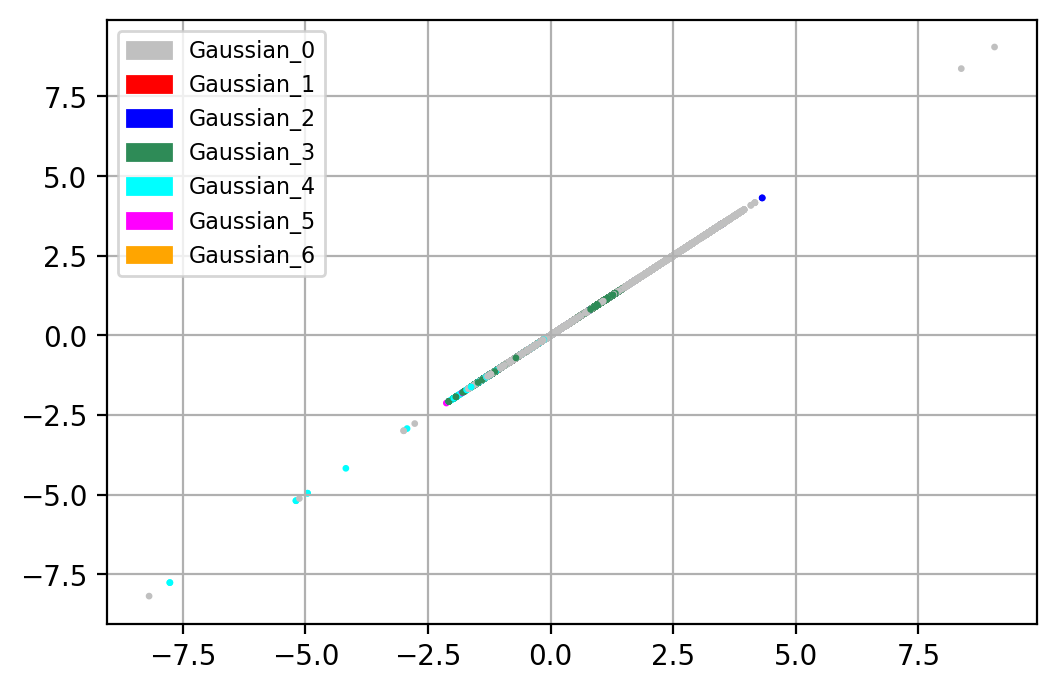

In [5]:
select = [2, 6, 7]
D = len(select)
train_point = train_point[:, select]
valid_point = valid_point[:, select]
test_point = test_point[:, select]

plot_sample(train_point, train_label)

In [7]:
# train
method = NN(D, neuron_1, act_func_1, NN_type="QNN")
method.train(train_point, train_label, valid_point, valid_label, step_size=500)

# result
accuracy = method.test(test_point, test_label)[0] * 100
time     = method.train_time
print("%02.04f  %02.4f" % (accuracy, time))

79.2552  125.8637


In [ ]:
# train
method = NN(D, neuron_2_100, act_func_2, NN_type="CNN")
method.train(train_point, train_label, valid_point, valid_label, step_size=500)

# result
accuracy = method.test(test_point, test_label)[0] * 100
time     = method.train_time
print("%02.04f  %02.4f" % (accuracy, time))

In [ ]:
# train
method = EM(K)
method.train(train_point)
method.order_correction(valid_point, valid_label)

# result
accuracy = method.test(test_point, test_label)[0] * 100
time     = method.train_time
print("%02.04f  %02.4f" % (accuracy, time))